In [1]:
from evaluation import *

In [2]:
filename = 'filtered_3way_after_80%.xes'


In [3]:
# log, VARIANT = read_xes(filename, n_DPI = 15)
log, VARIANT = read_xes(filename)


==================================================================================================== =READ THE XES FILElength of log 2534 
length of event 13589 
number of variants : 26


In [4]:
from pm4py.statistics.traces.log import case_statistics
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

import pandas as pd

stat=[]
d=[]
for v in variants_count : 
    stat.append([len(v['variant'].split(',')), v['count']])
    data=pd.DataFrame(stat, columns = ['len','size'])
    d.append(v['count'])
d=np.array(d)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 3200x3200 with 0 Axes>

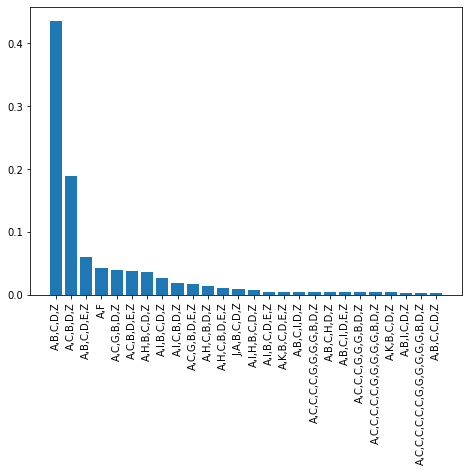

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.bar(VARIANT, d/sum(d))
plt.xticks(rotation=90)


****************************************************************************************************
START OF No. 0 CLUSTERING


Clustering() is called. mcs:0.4, tf:1, w:0.5
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 1267.0

		A,B,C,D,Z___added with size 1106 // 1106 out of 1267.0  // total size : 2534
		A,C,B,D,Z___added with size 481 // 1587 out of 1267.0  // total size : 2534
W creater END with its size: 2

 * C is empty set - size of |C|:0 ->  R[0] or  is to be added.

	cur_dpi = R[0] A,B,C,D,Z...



 * Fitness check to be done with cur_dpi
	 A,B,C,D,Z...

 * size of C is 0, fitness check is skipped and cur_dpi is added to C

 * CASE of fit 1 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	


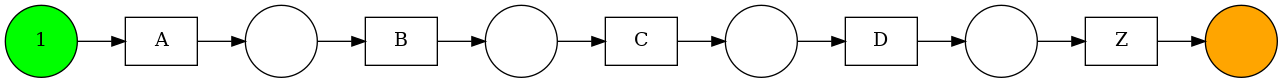


END OF LOOP with cur_dpi____fit : 1 / size of C: 1 / size of R: 25 / size of I: 0
* dpi(s) in C
 ['A,B,C,D,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,C,B,D,Z', 'A,B,C,D,E,Z', 'A,F', 'A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 714.0

		A,C,B,D,Z___added with size 481 // 481 out of 714.0  // total size : 1428
		A,B,C,D,E,Z___added with size 153 // 634 out of 714.0  // total size : 1428
		A,F___added with size 110 // 744 out of 714.0  // total size : 1428
W cre

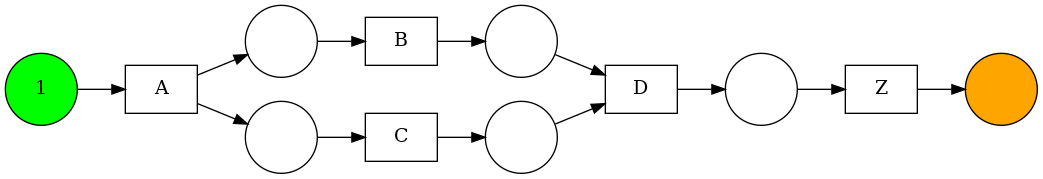


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 2 / size of R: 24 / size of I: 0
* dpi(s) in C
 ['A,B,C,D,Z', 'A,C,B,D,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,B,C,D,E,Z', 'A,F', 'A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 473.5

		A,B,C,D,E,Z___added with size 153 // 153 out of 473.5  // total size : 947
		A,F___added with size 110 // 263 out of 473.5  // total size : 947
		A,C,G,B,D,Z___added with size 98 // 361 out of 473.5  // total size : 947
		A,C

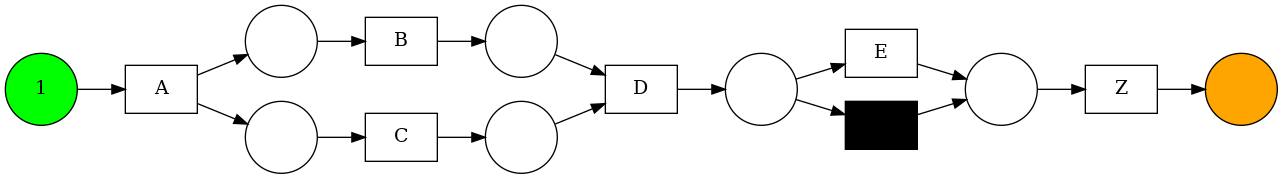


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 3 / size of R: 23 / size of I: 0
* dpi(s) in C
 ['A,B,C,D,Z', 'A,C,B,D,Z', 'A,B,C,D,E,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,F', 'A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 397.0

		A,F___added with size 110 // 110 out of 397.0  // total size : 794
		A,C,G,B,D,Z___added with size 98 // 208 out of 397.0  // total size : 794
		A,C,B,D,E,Z___added with size 97 // 305 out of 397.0  // total size : 794
		A,H,

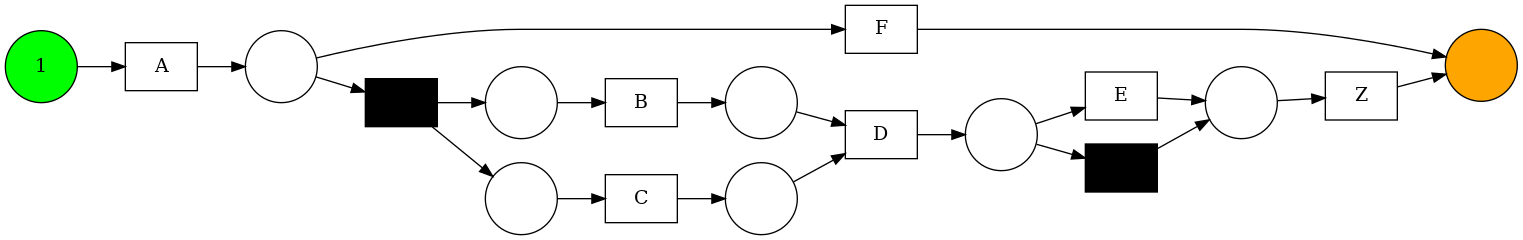


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 4 / size of R: 22 / size of I: 0
* dpi(s) in C
 ['A,B,C,D,Z', 'A,C,B,D,Z', 'A,B,C,D,E,Z', 'A,F']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 342.0

		A,C,G,B,D,Z___added with size 98 // 98 out of 342.0  // total size : 684
		A,C,B,D,E,Z___added with size 97 // 195 out of 342.0  // total size : 684
		A,H,B,C,D,Z___added with size 90 // 285 out of 342.0  // total size : 684


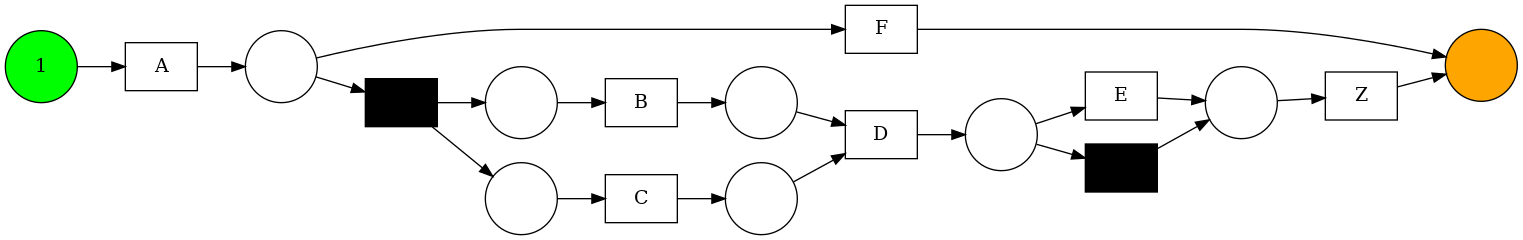

COMPLETION OF SINGLE CLUSTERING 0.73 been clustered (1850 out of 2534) // Remaining # traces 22
* dpi(s) in C
 ['A,B,C,D,Z', 'A,C,B,D,Z', 'A,B,C,D,E,Z', 'A,F']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']




****************************************************************************************************
START OF No. 1 CLUSTERING


Clustering() is called. mcs:0.4, tf:1, w:0.5
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 342.0

		A,C,G,B,D,Z___added with size 98 // 98

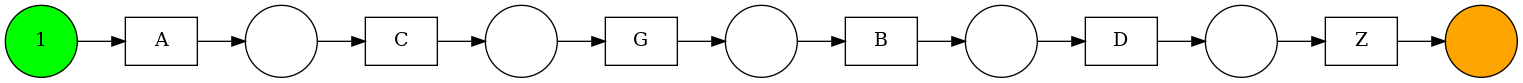


END OF LOOP with cur_dpi____fit : 1 / size of C: 1 / size of R: 21 / size of I: 0
* dpi(s) in C
 ['A,C,G,B,D,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,C,B,D,E,Z', 'A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 293.0

		A,C,B,D,E,Z___added with size 97 // 97 out of 293.0  // total size : 586
		A,H,B,C,D,Z___added with size 90 // 187 out of 293.0  // total size : 586
		A,I,B,C,D,Z___added with size 67 // 254 out of 293.0  // total size : 586
		A,I,C,B,D,Z___added with size 47 // 301 out of 2

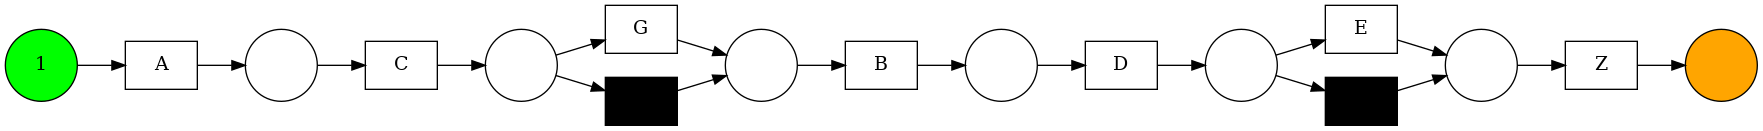


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 2 / size of R: 20 / size of I: 0
* dpi(s) in C
 ['A,C,G,B,D,Z', 'A,C,B,D,E,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 244.5

		A,H,B,C,D,Z___added with size 90 // 90 out of 244.5  // total size : 489
		A,I,B,C,D,Z___added with size 67 // 157 out of 244.5  // total size : 489
		A,I,C,B,D,Z___added with size 47 // 204 out of 244.5  // total size : 489
		A,C,G,B,D,E,Z___added with size 44 // 248 out 

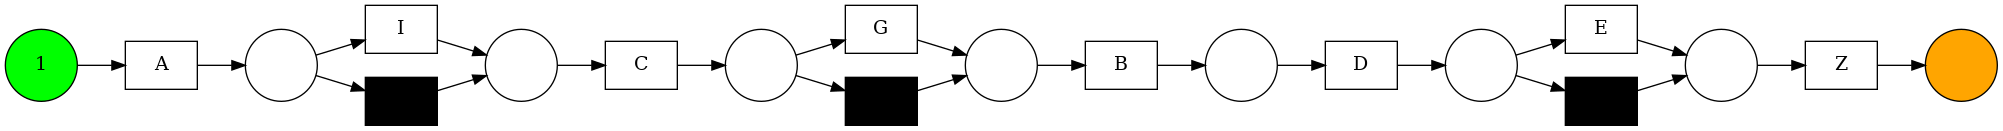


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 3 / size of R: 19 / size of I: 2
* dpi(s) in C
 ['A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,I,C,B,D,Z']
* dpi(s) in I
 ['A,I,B,C,D,Z', 'A,H,B,C,D,Z']
* remainig dpi(s) in R
 ['A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 142.5

		A,C,G,B,D,E,Z___added with size 44 // 44 out of 142.5  // total size : 285
		A,H,C,B,D,Z___added with size 37 // 81 out of 142.5  // total size : 285
		A,H,C,B,D,E,Z___added with size 29 // 110 out of 142.5  // total size : 285
		J,A,B,C,D,Z___a

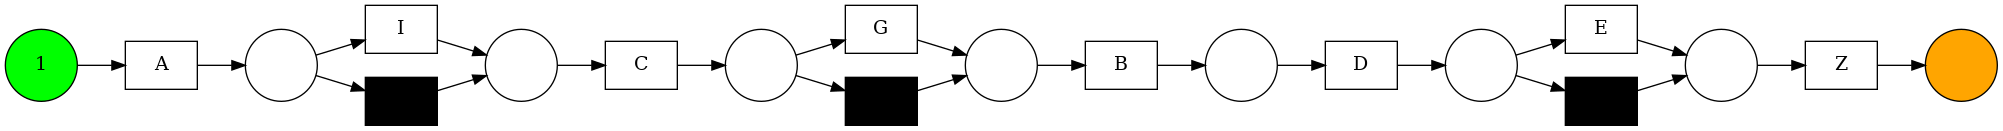


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 4 / size of R: 18 / size of I: 2
* dpi(s) in C
 ['A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z']
* dpi(s) in I
 ['A,I,B,C,D,Z', 'A,H,B,C,D,Z']
* remainig dpi(s) in R
 ['A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 120.5

		A,H,C,B,D,Z___added with size 37 // 37 out of 120.5  // total size : 241
		A,H,C,B,D,E,Z___added with size 29 // 66 out of 120.5  // total size : 241
		J,A,B,C,D,Z___added with size 23 // 89 out of 120.5  // total size : 241
		A,I,H,B,C,D,Z___ad

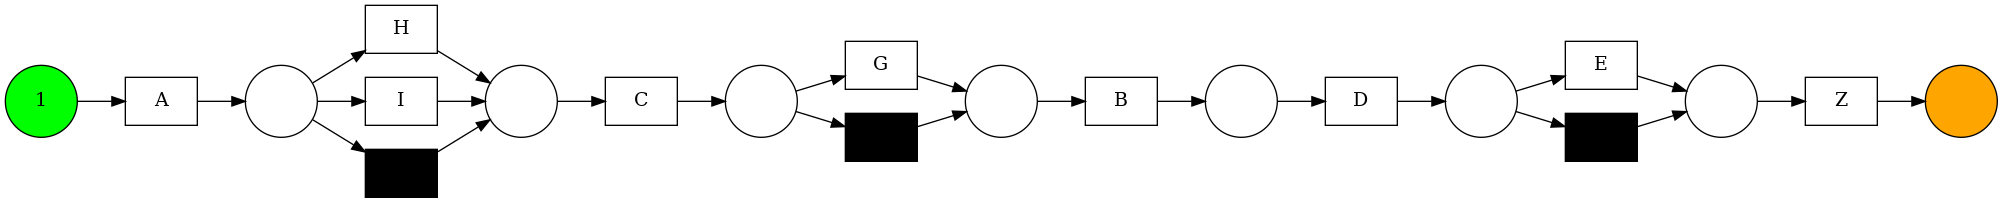


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 5 / size of R: 17 / size of I: 2
* dpi(s) in C
 ['A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z']
* dpi(s) in I
 ['A,I,B,C,D,Z', 'A,H,B,C,D,Z']
* remainig dpi(s) in R
 ['A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,H,C,B,D,E,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 102.0

		A,H,C,B,D,E,Z___added with size 29 // 29 out of 102.0  // total size : 204
		J,A,B,C,D,Z___added with size 23 // 52 out of 102.0  // total size : 204
		A,I,H,B,C,D,Z___added with size 19 // 71 out of 102.0  // total size : 204
		A,K,B,C,D,E,Z___

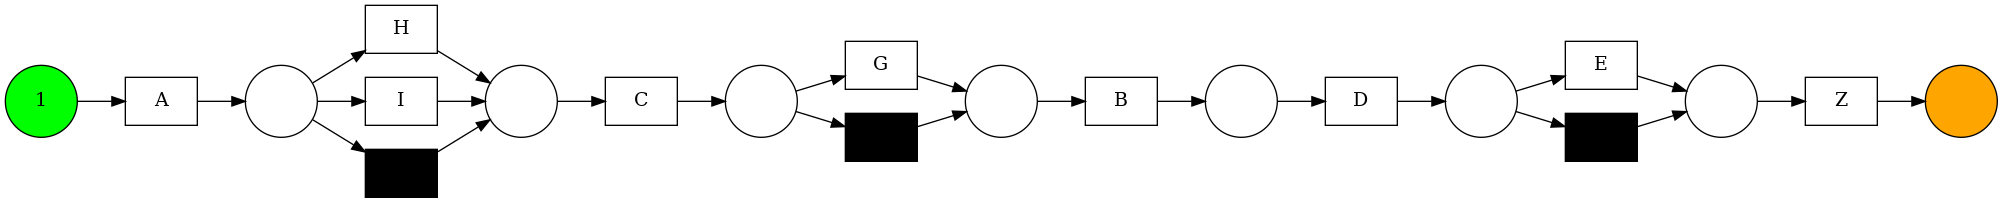


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 6 / size of R: 16 / size of I: 2
* dpi(s) in C
 ['A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z']
* dpi(s) in I
 ['A,I,B,C,D,Z', 'A,H,B,C,D,Z']
* remainig dpi(s) in R
 ['A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 87.5

		J,A,B,C,D,Z___added with size 23 // 23 out of 87.5  // total size : 175
		A,I,H,B,C,D,Z___added with size 19 // 42 out of 87.5  // total size : 175
		A,K,B,C,D,E,Z___added with size 13 // 55 out of 87.5  // total size : 175
		A,I,B,C,D,E,Z___adde

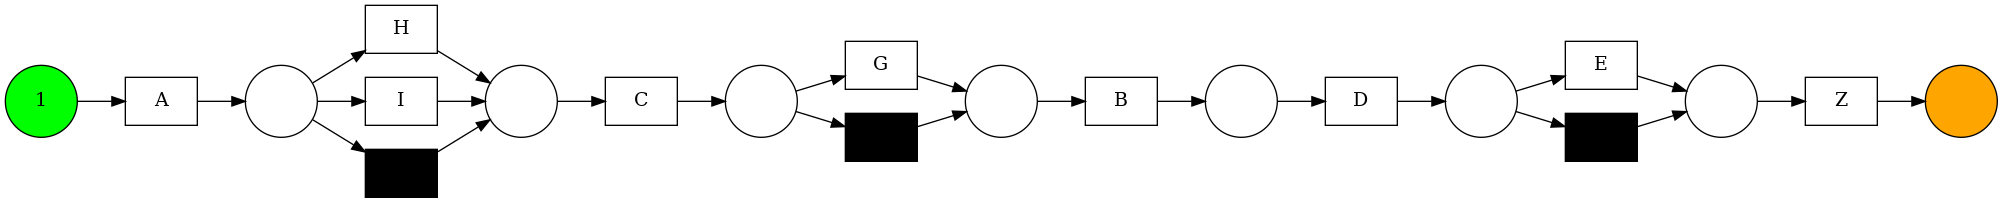

COMPLETION OF SINGLE CLUSTERING 0.87 been clustered (2202 out of 2534) // Remaining # traces 16
* dpi(s) in C
 ['A,C,G,B,D,Z', 'A,C,B,D,E,Z', 'A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z']
* dpi(s) in I
 ['A,H,B,C,D,Z']
* remainig dpi(s) in R
 ['A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']




****************************************************************************************************
START OF No. 2 CLUSTERING


Clustering() is called. mcs:0.4, tf:1, w:0.5
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 166.0

		A,H,B,C,D,Z___added with size 90 // 90 out of 166.0  // total size : 332


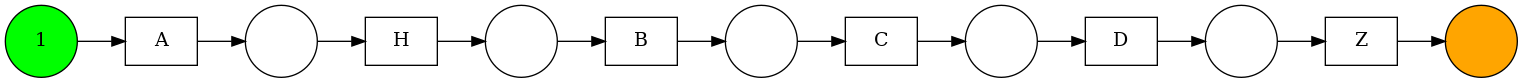


END OF LOOP with cur_dpi____fit : 1 / size of C: 1 / size of R: 15 / size of I: 0
* dpi(s) in C
 ['A,H,B,C,D,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,I,B,C,D,Z', 'J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 121.0

		A,I,B,C,D,Z___added with size 67 // 67 out of 121.0  // total size : 242
		J,A,B,C,D,Z___added with size 23 // 90 out of 121.0  // total size : 242
		A,I,H,B,C,D,Z___added with size 19 // 109 out of 121.0  // total size : 242
		A,K,B,C,D,E,Z___added with size 13 // 122 out of 121.0  // total size : 242
W creater END with its size: 4

 * C is not empty set and W is la

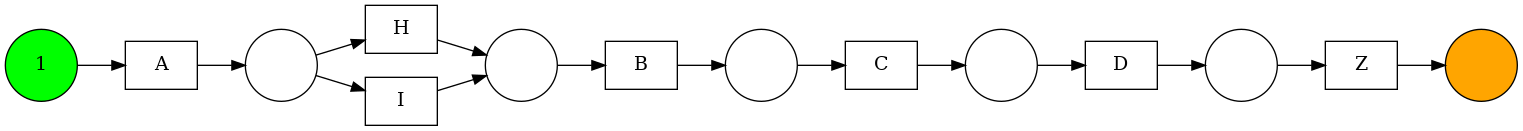


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 2 / size of R: 14 / size of I: 0
* dpi(s) in C
 ['A,H,B,C,D,Z', 'A,I,B,C,D,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 87.5

		J,A,B,C,D,Z___added with size 23 // 23 out of 87.5  // total size : 175
		A,I,H,B,C,D,Z___added with size 19 // 42 out of 87.5  // total size : 175
		A,K,B,C,D,E,Z___added with size 13 // 55 out of 87.5  // total size : 175
		A,I,B,C,D,E,Z___added with size 13 // 68 out of 87.5  // total size : 175
		A,C,C,C,C,G,G,G,G,B,D,Z___added with size 13 // 81 out of 87.5  //

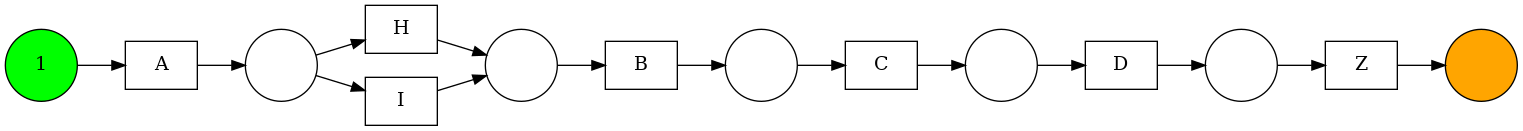

COMPLETION OF SINGLE CLUSTERING 0.9299999999999999 been clustered (2359 out of 2534) // Remaining # traces 14
* dpi(s) in C
 ['A,H,B,C,D,Z', 'A,I,B,C,D,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']




****************************************************************************************************
START OF No. 3 CLUSTERING


Clustering() is called. mcs:0.4, tf:1, w:0.5
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 87.5

		J,A,B,C,D,Z___added with size 23 // 23 out of 87.5  // total size : 175
		A,I,H,B,C,D,Z___added with size 19 // 42 out of 87.5  // total size : 175
		A,K,B,C,D,E,Z___a

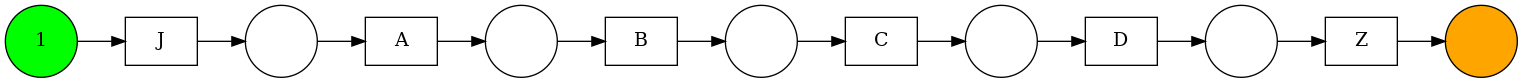


END OF LOOP with cur_dpi____fit : 1 / size of C: 1 / size of R: 13 / size of I: 0
* dpi(s) in C
 ['J,A,B,C,D,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,I,H,B,C,D,Z', 'A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 76.0

		A,I,H,B,C,D,Z___added with size 19 // 19 out of 76.0  // total size : 152
		A,K,B,C,D,E,Z___added with size 13 // 32 out of 76.0  // total size : 152
		A,I,B,C,D,E,Z___added with size 13 // 45 out of 76.0  // total size : 152
		A,C,C,C,C,G,G,G,G,B,D,Z___added with size 13 // 58 out of 76.0  // total size : 152
		A,B,C,I,D,Z___added with size 13 // 71 out of 76.0  // total size : 152
		A,B,C,H,D,Z_

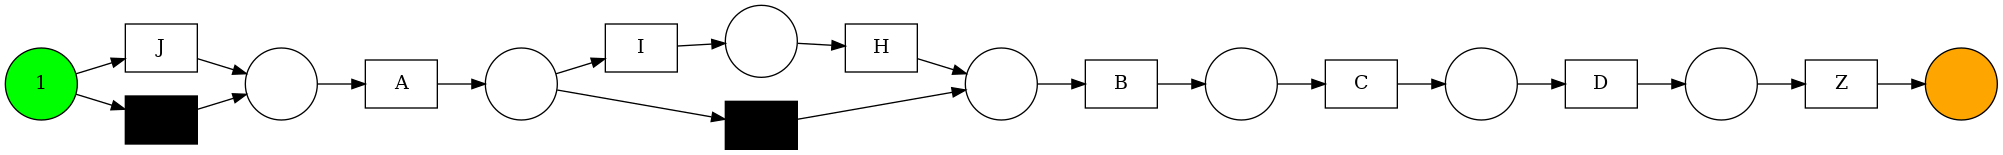


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 2 / size of R: 12 / size of I: 0
* dpi(s) in C
 ['J,A,B,C,D,Z', 'A,I,H,B,C,D,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,I,B,C,D,E,Z', 'A,K,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 66.5

		A,K,B,C,D,E,Z___added with size 13 // 13 out of 66.5  // total size : 133
		A,I,B,C,D,E,Z___added with size 13 // 26 out of 66.5  // total size : 133
		A,C,C,C,C,G,G,G,G,B,D,Z___added with size 13 // 39 out of 66.5  // total size : 133
		A,B,C,I,D,Z___added with size 13 // 52 out of 66.5  // total size : 133
		A,B,C,H,D,Z___added with size 13 // 65 out of 66.5  // total size : 133
		A,B,C,I,D,E,

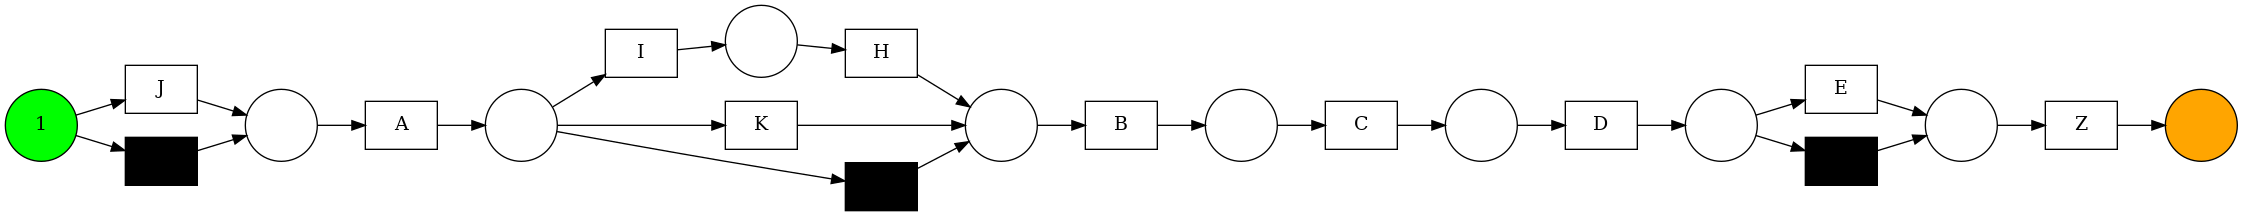


END OF LOOP with cur_dpi____fit : 1.0 / size of C: 3 / size of R: 11 / size of I: 0
* dpi(s) in C
 ['J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,K,B,C,D,E,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,I,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi
W creater called with w : 0.5 and target size 60.0

		A,I,B,C,D,E,Z___added with size 13 // 13 out of 60.0  // total size : 120
		A,C,C,C,C,G,G,G,G,B,D,Z___added with size 13 // 26 out of 60.0  // total size : 120
		A,B,C,I,D,Z___added with size 13 // 39 out of 60.0  // total size : 120
		A,B,C,H,D,Z___added with size 13 // 52 out of 60.0  // total size : 120
		A,B,C,I,D,E,Z___added with size 12 // 64 out of 60.0  // total size : 120
W creater END 

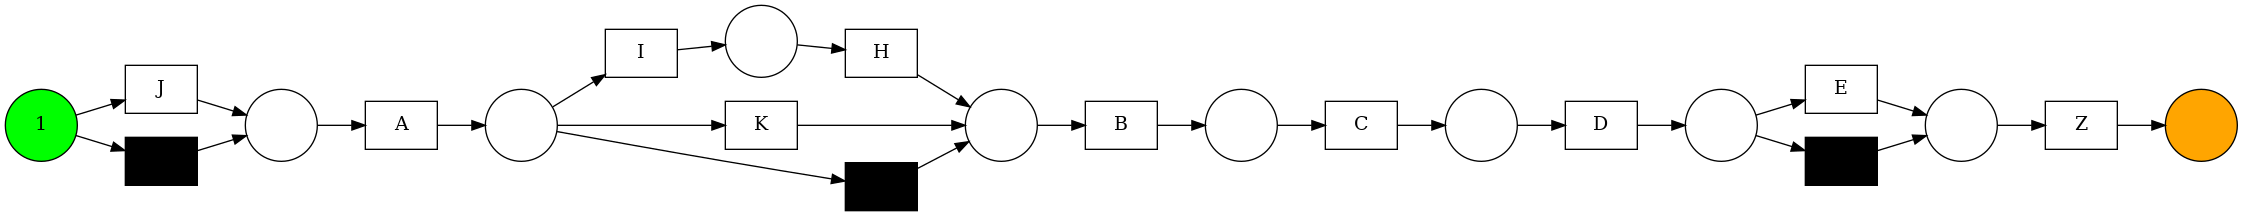

COMPLETION OF SINGLE CLUSTERING 0.95 been clustered (2414 out of 2534) // Remaining # traces 11
* dpi(s) in C
 ['J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,K,B,C,D,E,Z']
* dpi(s) in I
 []
* remainig dpi(s) in R
 ['A,I,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,C,C,C,C,G,G,G,G,B,D,Z', 'A,B,C,H,D,Z', 'A,B,C,I,D,E,Z', 'A,C,C,C,G,G,G,B,D,Z', 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z', 'A,K,B,C,D,Z', 'A,B,I,C,D,Z', 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z', 'A,B,C,C,D,Z']




COMPLETION OF WHOLE CLUSTERING

STEP 3_ since N = 0, all the remaining traces are moved to the most suitable clusters
STEP 3 : residual trace resolution ahead step start
0 out of 11 is added to 0 cluster with fitness1.0 : A,I,B,C,D,E,Z
1 out of 11 is added to 0 cluster with fitness1.0 : A,B,C,I,D,Z
2 out of 11 is added to 1 cluster with fitness0.8 : A,C,C,C,C,G,G,G,G,B,D,Z
3 out of 11 is added to 0 cluster with fitness1.0 : A,B,C,H,D,Z
4 out of 11 is added to 0 cluster with fitness1.0 : A,B,C,I,D,E,Z
5 out of 11 is added to 1 cluster with fitness0.85 : A,C,C,C,

In [6]:
CS = A_clustering(
    log, VARIANT,
    w = 0.5,  tf = 1, nb_clus = 4, mcs = 0.4,
    N = 0,  
    visual=True,
    output=True
    
)

visualization of VARIANT
#variants:26 / #traces:2534 / fitness0.87267965539951


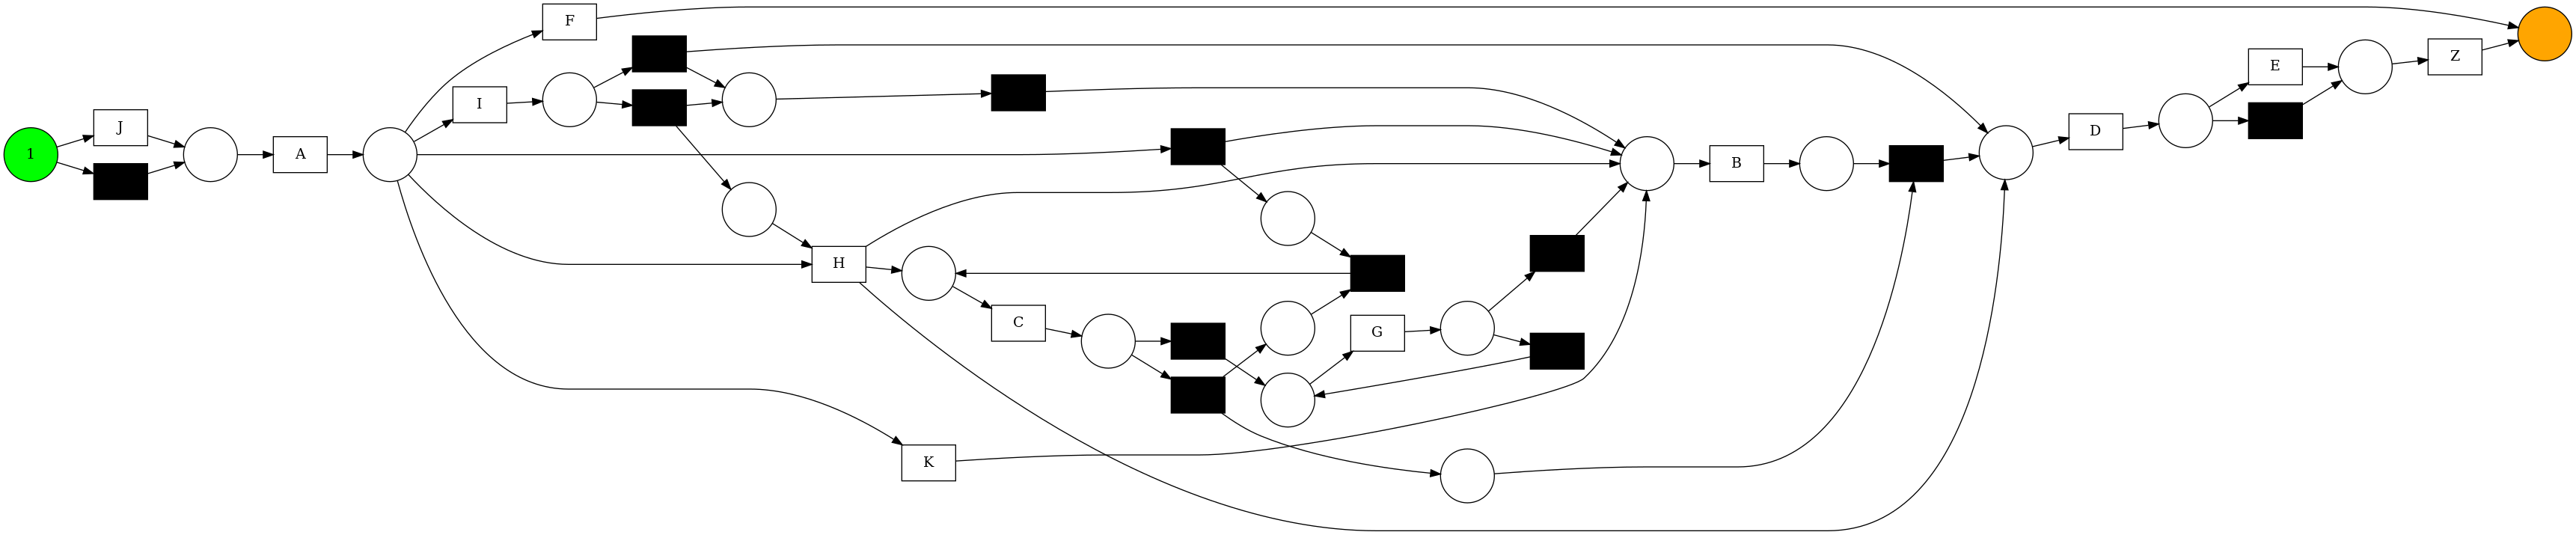

visualization of each cluster in CS
#variants:4 / #traces:1850 / fitness1.0


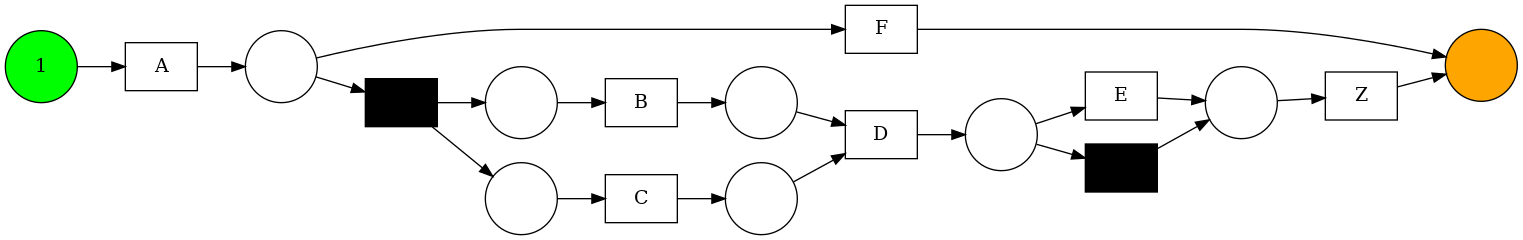

#variants:6 / #traces:352 / fitness1.0


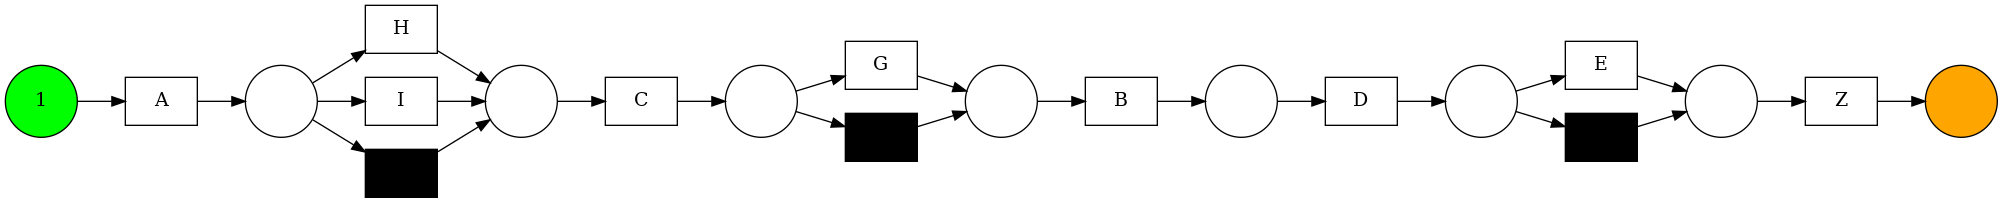

#variants:2 / #traces:157 / fitness1.0


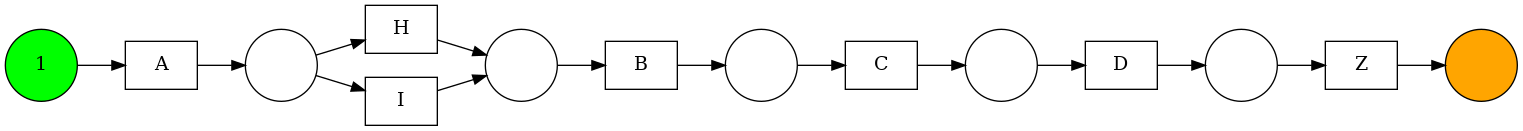

#variants:14 / #traces:175 / fitness0.928194905395985


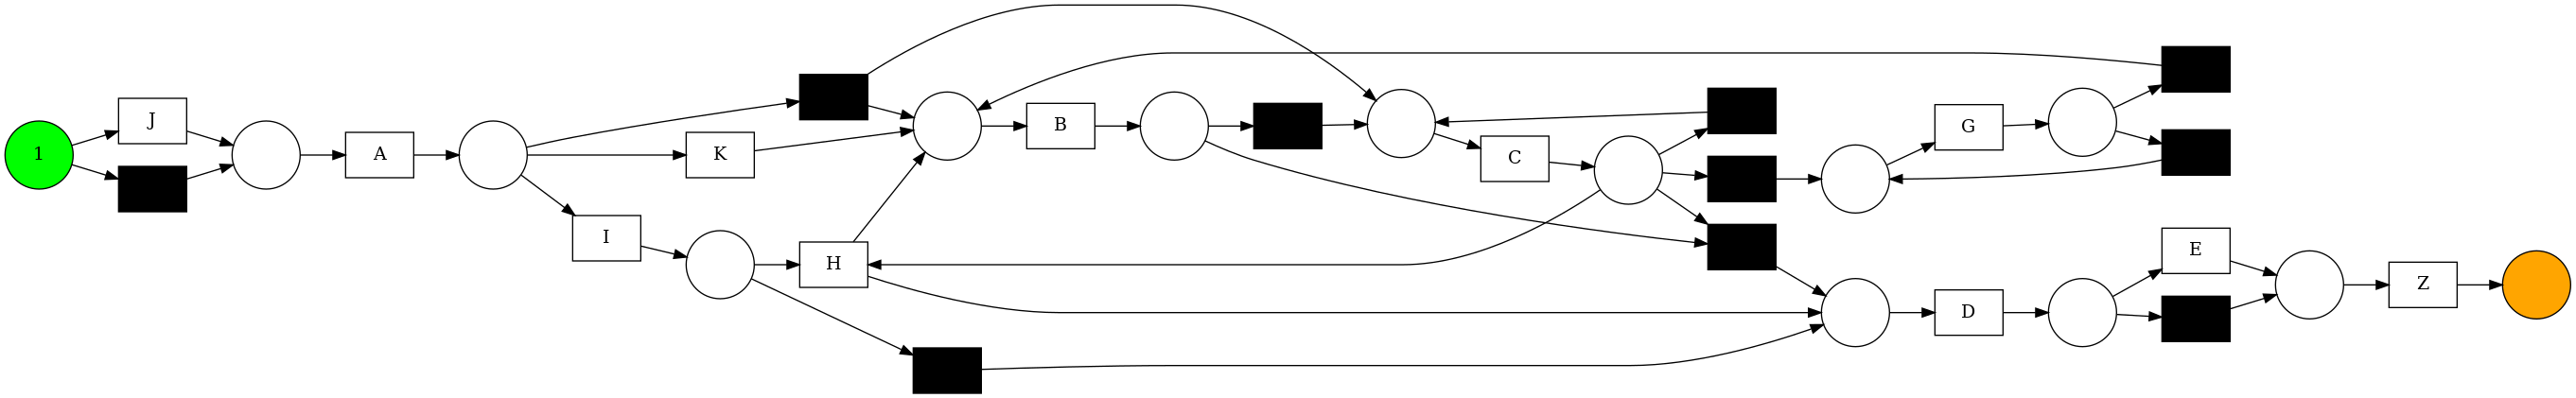

In [7]:
visualization_total(log, VARIANT, CS, freq_check=True)

In [8]:
quality_measure(log,CS)

[[1850, 1.0, 0.966857300351409, 0.9617323326658829, 0.8181818181818181], [352, 1.0, 0.9284720289451711, 0.9246759897523494, 0.7777777777777779], [157, 1.0, 1.0, 0.9104825511529911, 1.0], [175, 0.928194905395985, 0.648742746615087, 0.8367939765953277, 0.6140350877192983]]
fitness:0.9950410846267944, prec:0.9416093687831284, gen:0.9447811642698942, simp:0.8097357070895891, weighted by # traces


[0.9950410846267944,
 0.9416093687831284,
 0.9447811642698942,
 0.8097357070895891]

In [9]:
evaluation_w_hm(log)

[2534,
 0.8739722745769061,
 0.9861665165358384,
 0.8909098329789268,
 0.6056338028169015]